# Chapter 4 Exercises 1-5

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from scipy.special import expit as logistic
import arviz as az
import pymc3 as pm
np.random.seed(123)

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


## Exercise 1
***

In [3]:
iris = pd.read_csv('../code/data/iris.csv')
df = iris.query("species == ('setosa', 'versicolor')")
y_0 = pd.Categorical(df['species']).codes

varnames = ['α', 'β', 'bd']


In [9]:
for feature in ["sepal_length", "petal_width", "petal_length"]:

    x_n = feature
    x_0 = df[x_n].values
    x_c = x_0 - x_0.mean()

    with pm.Model() as model_0:
        α = pm.Normal('α', mu=0, sd=10)
        β = pm.Normal('β', mu=0, sd=10)

        μ = α + pm.math.dot(x_c, β)    
        θ = pm.Deterministic('θ', pm.math.sigmoid(μ))
        bd = pm.Deterministic('bd', -α/β)

        yl = pm.Bernoulli('yl', p=θ, observed=y_0)

        trace_0 = pm.sample(1000)
        print("Feature {} summary".format(feature))
        print(az.summary(trace_0, varnames, credible_interval=.95))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [β, α]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:01<00:00, 1550.70draws/s]


Feature sepal_length summary
    mean    sd  mc error  hpd 2.5%  hpd 97.5%   eff_n  r_hat
α   0.31  0.33      0.00     -0.31       0.95  1810.0    1.0
β   5.44  1.01      0.03      3.52       7.43  1235.0    1.0
bd -0.06  0.06      0.00     -0.17       0.07  1965.0    1.0


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [β, α]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:02<00:00, 1202.43draws/s]
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.


Feature petal_width summary
     mean    sd  mc error  hpd 2.5%  hpd 97.5%  eff_n  r_hat
α    0.44  1.66      0.03     -2.99       3.67  750.0    1.0
β   17.51  5.16      0.18      8.96      28.14  711.0    1.0
bd  -0.03  0.09      0.00     -0.19       0.14  910.0    1.0


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [β, α]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:02<00:00, 1119.97draws/s]
There were 17 divergences after tuning. Increase `target_accept` or reparameterize.
There were 41 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


Feature petal_length summary
     mean    sd  mc error  hpd 2.5%  hpd 97.5%  eff_n  r_hat
α    3.77  4.04      0.09     -2.53      12.16  472.0    1.0
β   12.67  5.03      0.18      4.39      22.47  416.0    1.0
bd  -0.30  0.28      0.00     -0.84       0.19  618.0    1.0


From the results we can see that bd variable HPD is the smallest with sepal length, and increases with petal_width, and petal_length.

## Exercise 2
***

In [22]:
for nu in [1,10, 30]:

    x_0 = df["petal_length"].values
    x_c = x_0 - x_0.mean()

    with pm.Model() as model_0:
        # Priors have been changed
        α = pm.StudentT('α', nu=nu, mu=0, sd=10)
        β = pm.StudentT('β', nu=nu, mu=0, sd=10)


        μ = α + pm.math.dot(x_c, β)    
        θ = pm.Deterministic('θ', pm.math.sigmoid(μ))
        bd = pm.Deterministic('bd', -α/β)

        yl = pm.Bernoulli('yl', p=θ, observed=y_0)

        trace_0 = pm.sample(1000)
        print("Feature {} nu {} summary".format(feature, nu))
        print(az.summary(trace_0, varnames, credible_interval=.95))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [β, α]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:04<00:00, 639.61draws/s] 
There were 647 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5264402598944427, but should be close to 0.8. Try to increase the number of tuning steps.
There were 491 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7167719576136763, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.


Feature petal_length nu 1 summary
      mean       sd  mc error  hpd 2.5%  hpd 97.5%  eff_n  r_hat
α     2.44    10.53      0.49    -13.59      19.49  457.0   1.00
β   430.73  1704.98    289.78      4.53    1476.60   27.0   1.04
bd   -0.11     0.20      0.02     -0.54       0.20  110.0   1.00


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [β, α]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:02<00:00, 1126.81draws/s]
There were 118 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6891760014617333, but should be close to 0.8. Try to increase the number of tuning steps.
There were 57 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


Feature petal_length nu 10 summary
     mean    sd  mc error  hpd 2.5%  hpd 97.5%  eff_n  r_hat
α    4.01  4.54      0.13     -3.37      13.16  294.0    1.0
β   14.59  7.12      0.27      4.17      28.55  391.0    1.0
bd  -0.28  0.28      0.01     -0.79       0.21  411.0    1.0


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [β, α]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:03<00:00, 863.92draws/s]
There were 33 divergences after tuning. Increase `target_accept` or reparameterize.
There were 52 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


Feature petal_length nu 30 summary
     mean    sd  mc error  hpd 2.5%  hpd 97.5%  eff_n  r_hat
α    3.65  4.13      0.28     -3.21      12.31  448.0   1.01
β   13.29  5.92      0.33      3.95      25.12  310.0   1.00
bd  -0.28  0.28      0.02     -0.80       0.20  542.0   1.01


## Exercise 3
***

In [25]:
x_n = "sepal_length"
x_0 = df[x_n].values
x_c = x_0 - x_0.mean()

with pm.Model() as model_0:
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=10)
    sd = pm.HalfNormal("sd", sd=1)

    μ = α + pm.math.dot(x_c, β)

    yl = pm.Normal('yl', mu=μ, sd=sd, observed=y_0)
    trace_linear = pm.sample(1000)
    posterior_predictive_linear = pm.sample_posterior_predictive(trace_linear)
    print(az.summary(trace_linear, credible_interval=.95))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, β, α]
100%|██████████| 2000/2000 [00:01<00:00, 1210.15it/s]


    mean    sd  mc error  hpd 2.5%  hpd 97.5%   eff_n  r_hat
α   0.50  0.04       0.0      0.43       0.57  2390.0    1.0
β   0.57  0.05       0.0      0.46       0.67  2639.0    1.0
sd  0.35  0.03       0.0      0.30       0.40  2558.0    1.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c16220dd8>],
      dtype=object)

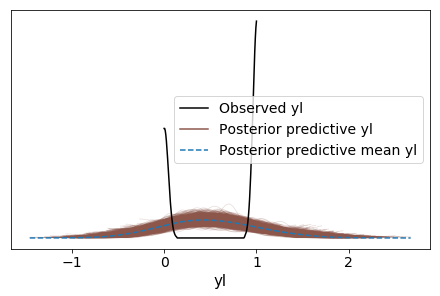

In [27]:
data = az.from_pymc3(trace=trace_linear, posterior_predictive=posterior_predictive_linear)
az.plot_ppc(data)

From the posterior predictive check this model is not very useful. We are trying to estimate the probability of a species given a sepal_length, but a number of the posterior predictive check values are below 0 and above 1. As is such the result cannot be interpreted as probability.

## Exercise 4
***

In [28]:
df = iris.query("species == ('setosa', 'versicolor')") 
y_1 = pd.Categorical(df['species']).codes 
x_n = ['sepal_length', 'sepal_width'] 
x_1 = df[x_n].values

In [29]:
with pm.Model() as model_1: 
    α = pm.Normal('α', mu=0, sd=10) 
    β = pm.Normal('β', mu=0, sd=2, shape=len(x_n)) 
     
    μ = α + pm.math.dot(x_1, β) 
    θ = pm.Deterministic('θ', 1 / (1 + pm.math.exp(-μ))) 
    bd = pm.Deterministic('bd', -α/β[1] - β[0]/β[1] * x_1[:,0])
     
    yl = pm.Bernoulli('yl', p=θ, observed=y_1) 
 
    trace_1 = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [β, α]
Sampling 2 chains: 100%|██████████| 5000/5000 [00:14<00:00, 338.99draws/s]


In [30]:
varnames = ['α', 'β'] 
summary = az.summary(trace_1, var_names=varnames)
summary

,mean,sd,mc error,hpd 3%,hpd 97%,eff_n,r_hat
α,-9.22,4.60,0.13,-17.97,-0.52,1496.0,1.0
β[0],4.69,0.88,0.02,3.02,6.29,1480.0,1.0
β[1],-5.19,1.00,0.01,-7.03,-3.27,1809.0,1.0


In [34]:
x_1 = 4.5  # sepal_length
x_2 = 3   # sepal_width 

log_odds_versicolor_i = (summary['mean'] * [1, x_1, x_2]).sum()
probability_versicolor_i = logistic(log_odds_versicolor_i)


log_odds_versicolor_f = (summary['mean'] * [1, x_1, x_2+1]).sum()
probability_versicolor_f = logistic(log_odds_versicolor_f)

log_odds_versicolor_f - log_odds_versicolor_i, probability_versicolor_f - probability_versicolor_i

(-5.190000000000001, -0.024342905359618146)

The value of -5.19 is consistent across the summary and our "hand check"

# Question 5
***

In [35]:
# Values for sepal length are directly added in the log_odds_line
x_2 = 3   # sepal_width 

log_odds_versicolor_i = (summary['mean'] * [1, 5.5, x_2]).sum()
probability_versicolor_i = logistic(log_odds_versicolor_i)


log_odds_versicolor_f = (summary['mean'] * [1, 6.5, x_2]).sum()
probability_versicolor_f = logistic(log_odds_versicolor_f)

log_odds_versicolor_f - log_odds_versicolor_i, probability_versicolor_f - probability_versicolor_i

(4.689999999999998, 0.26460803108218767)